<a href="https://colab.research.google.com/github/rishuptdr/global-/blob/main/_play_store_app_review_analysis_capstone_project_by_rishabh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Index Of Contents

· Introduction

· Data Preparation and Cleaning

· Exploratory Analysis and Visualization

∘ Let’s plot a visualization graph to view what portion of the apps in the play store are paid and free.

∘ Let’s have a look at the distribution of the ratings of the data frame.

  
∘ What are the Top 10 installed apps in any category?

∘ Which category App’s have the most number of installs?

∘ Which are the Apps with the highest number of reviews?

∘ Which are the apps that have made the highest-earning?

∘ Which are the top 10 expensive Apps in the play store?

∘ What are the count of Apps in different genres?

 
· Inferences and Conclusion

· References

#Introduction
There are more than 3.04 million apps found on Google Play Store. With this project/article I will take you through a journey of analyzing various apps found on the play store with the help of different python libraries.

Dataset: The dataset consists of 13 columns:- App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver with 10841 Rows.


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#some more 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from scipy.interpolate import interp1d

In [ ]:
!pip install jovian

In [ ]:
import pandas as pd
import numpy as np
import jovian

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import relevent data

In [ ]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path= "/content/drive/MyDrive/project/Copy of Play Store Data.csv"
df= pd.read_csv(file_path)

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


##To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Preparation and Cleaning

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [ ]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


##We have some useful information about the dataset. i.e., we can now see the missing number of values of any attribute, its unique count, and its respective data types.

Now we can start the process of data cleaning, lets start with the column Type :-

In [ ]:
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


##Since there is only one missing value in this column, So, let’s fill the missing value. After cross-checking in the play store the missing value is found to be Free, So now we can fill the missing value with free .

In [ ]:
df['Type'].fillna("Free", inplace = True)
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<!-- Now, we can move on to the column Content Rating : -->

##Now, we can move on to the column Content Rating :

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##By, looking only at these rows it is not easy to say what's actually missing in this row. let us have a look at all of its near rows data. For this purpose, we have iloc and loc function.

In [ ]:
df.loc[10465:10480, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We can clearly see that row 10472 has missing data for the Categorycolumn and all the prevailing column values are being replaced with its previous column. A better idea will be to drop this row from our data frame.

In [ ]:
df.dropna(subset = ['Content Rating'], inplace=True)

We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [ ]:
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

Now, we can fix the Rating column which contains a total of 1474 of missing values. Replacing the missing values with the Modevalue of that entire column.

In [ ]:
modeValueRating = df['Rating'].mode()

In [ ]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

##Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as printinfo() . So, it’s time to use that function.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


##All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values

###Now we are done with the data cleansing part and in a state to start the work for data preparation

Starting with the column Reviews , converting its type to int .

In [ ]:
df['Reviews'] = df.Reviews.astype(int)

###Now, the reviews column has been converted to int type, so now we can move to the Column: Size
###Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .

##Removing the Symbol:

In [ ]:
df['Reviews'] = df.Reviews.astype(int)

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
df.dropna(subset = ['Size'], inplace=True)

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


#### Column: `Installs`
Converting the `Installs` column from *object* to *integer*

In [ ]:
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))
df['Installs'] = pd.to_numeric(df['Installs'])

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


#### Column: `Price`
Converting the **Price** column from `object`to `numeric`

In [ ]:
df['Price'].value_counts()
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'])


In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


---------------**Now we are done with the ``Data Preparation and Cleaning``**------------------
**Note**: In this section *Data Preparation and Cleaning*. We can see that the original dataset contains `10841` Rows and `13` Columns. It contained `App`,	`Category`,	`Rating`, `Reviews`, `Size`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres`, `Last Updated`, `Current Ver`, and `Android Ver` Columns. But after cleansing the dataset and droping the unwanted rows and columns having Null Values and Garbage data from the database, we are left with `8434` Rows and `10` Columns.

## Exploratory Analysis and Visualization

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent a property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [ ]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

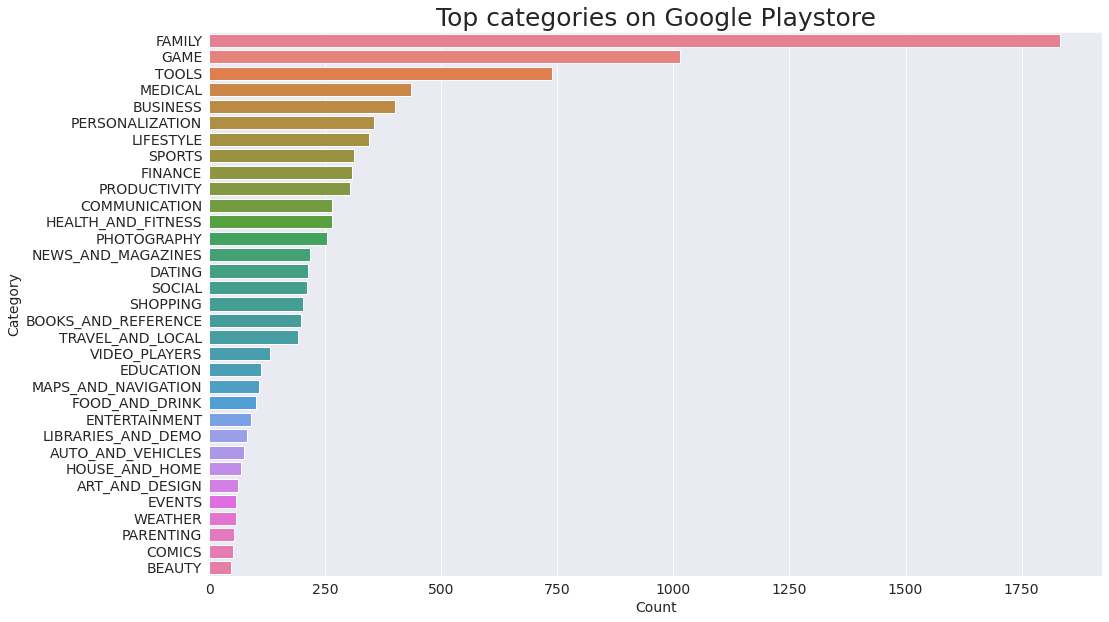

In [ ]:
plt.figure(figsize=(16,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);


**Note:** So there are all total 33 categories in the dataset
From the above output we can come to a conclusion that in playstore most of the apps are under `Family` & `Game` category and least are of `Beauty` & `Comics` Category.

### Let's plot a visualization graph to view what portion of the apps in playstore are paid and free

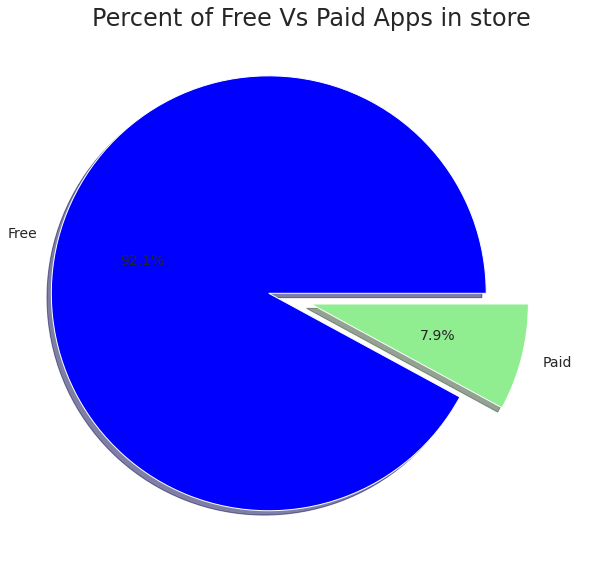

In [ ]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 24)
plt.show()

**Note:** From the above graph we can see that 92%(Approx.) of apps in google play store are free and 8%(Approx.) are paid.

### Let's have a look at the distribution of the ratings the dataframe.

In [ ]:
df['Rating'].describe()

count    9145.000000
mean        4.208868
std         0.507267
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

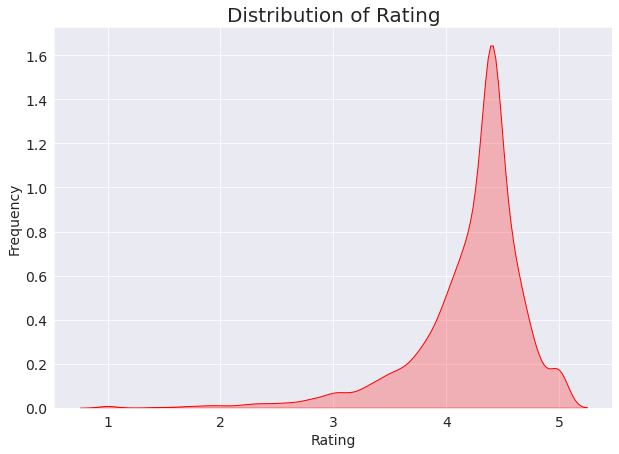

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="red", shade = True)
plt.title('Distribution of Rating',size = 20);

**Note**: From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between `3.5` to `4.8`

####  What are the Top 10 installed apps in any `category`?

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 =df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(10,7))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

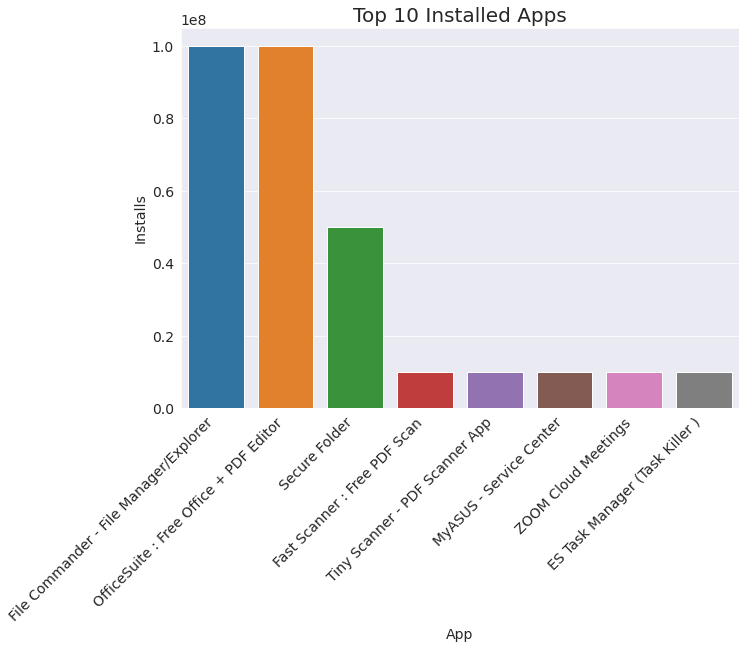

In [ ]:
findtop10incategory('Business')

**Note:** From the above graph we can see that in the `Business` category **file commander**, and **officesuite** has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

### Which category App's have most number of installs?

In [ ]:
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [ ]:
highest_Installs_df.head()


,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


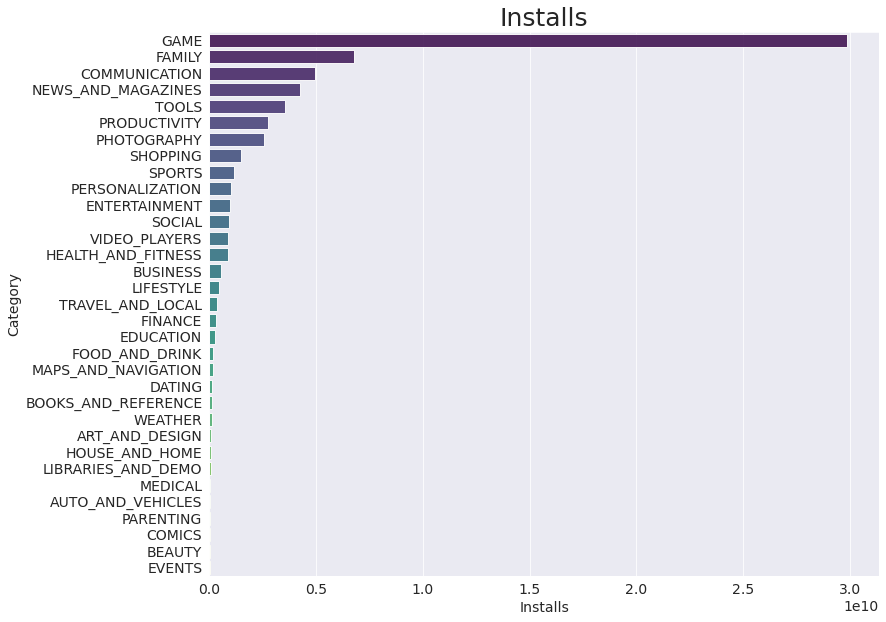

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(12,10))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

**Note:** From the above visualization, it can be interpreted that the top categories with highest installs are `Game`, `Family`, `Communication`, `News & Magazines`, & `Tools`.

##Which are the Apps with highest number of reviews?

In [ ]:
Apps_with_Highest_rev = df.sort_values(by='Reviews', ascending=False).head(20)

In [ ]:
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


**Note:** From the above dataframe we can interprete, and come to conculsion that the Apps like `Clash of Clans`, `Subway Surfers`, `Clash Royale`, and `Candy Crush Saga` has the highest number of reviews on google playstore.

## Which are the apps that have made the highest earning?

In [ ]:
Paid_Apps_df = df[df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];

In [ ]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

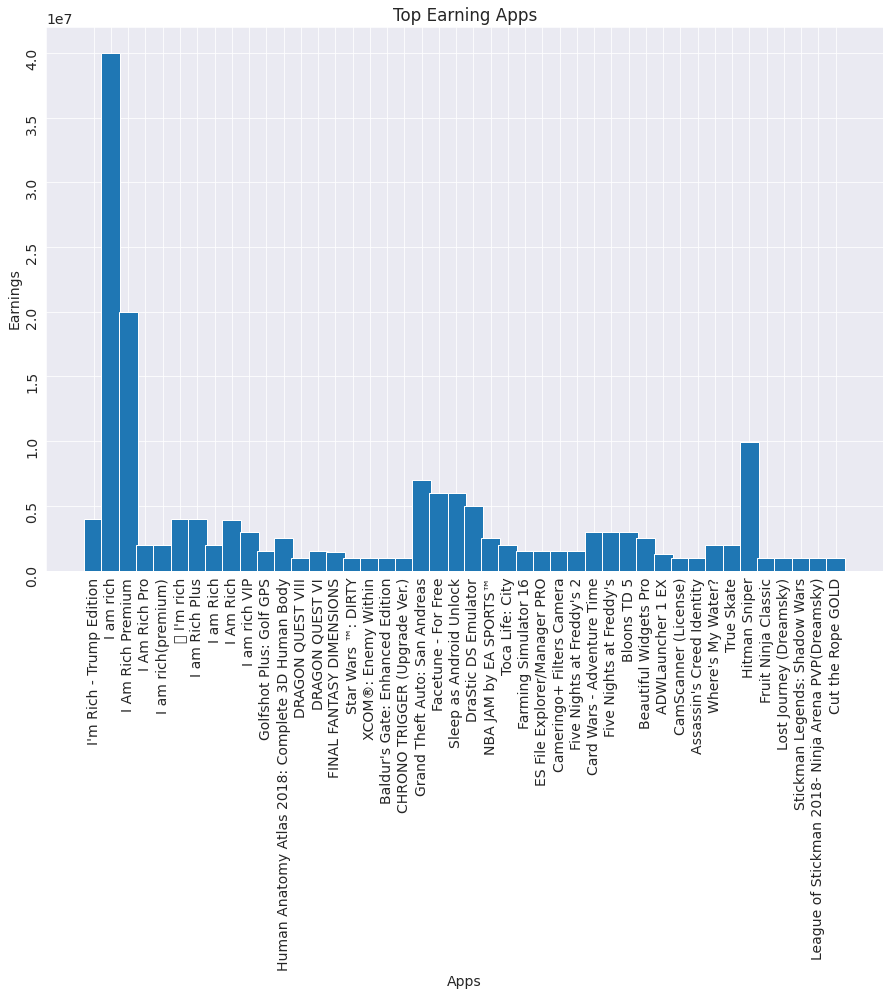

In [ ]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,10))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

**Note:** The top five apps with highest earnings found on google playstore are:-
- `I am Rich`
- `I am Rich Premium`
- `Hitman Sniper`
- `Grand Theft Auto: San Andreas`
- `Facetune - For Free`

###Which are the top 10 expensive Apps in playstore?

In [ ]:
top10PaidApps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
# top10PaidApps
top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)

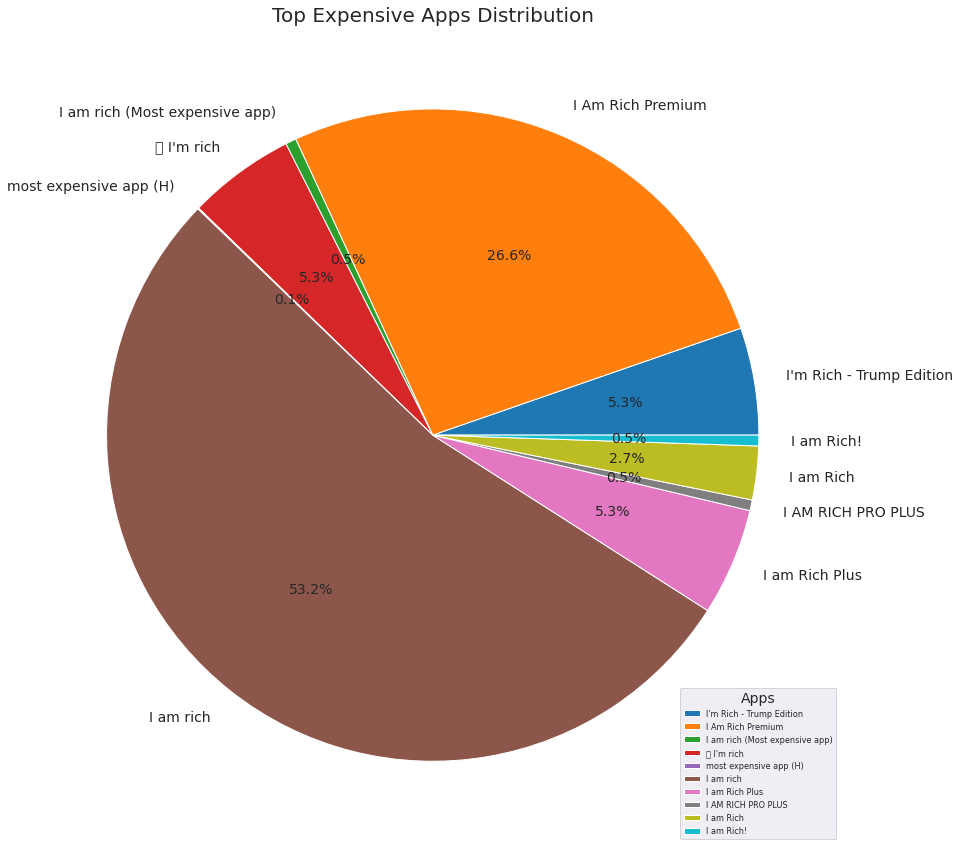

In [ ]:
plt.figure(figsize=(15,15));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

**Note:** From the above graph we can interprete that the App `I am rich` is the most expensive app in the google playstore followed by `I am Rich Premium`. we also had to drop one row data for this visualization because the language of the app was `Chinese` and it was messing with the pie chart, visualization.

##What are the count of Apps in different genres?

In [ ]:
topAppsinGenres = df['Genres'].value_counts().head(30)
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

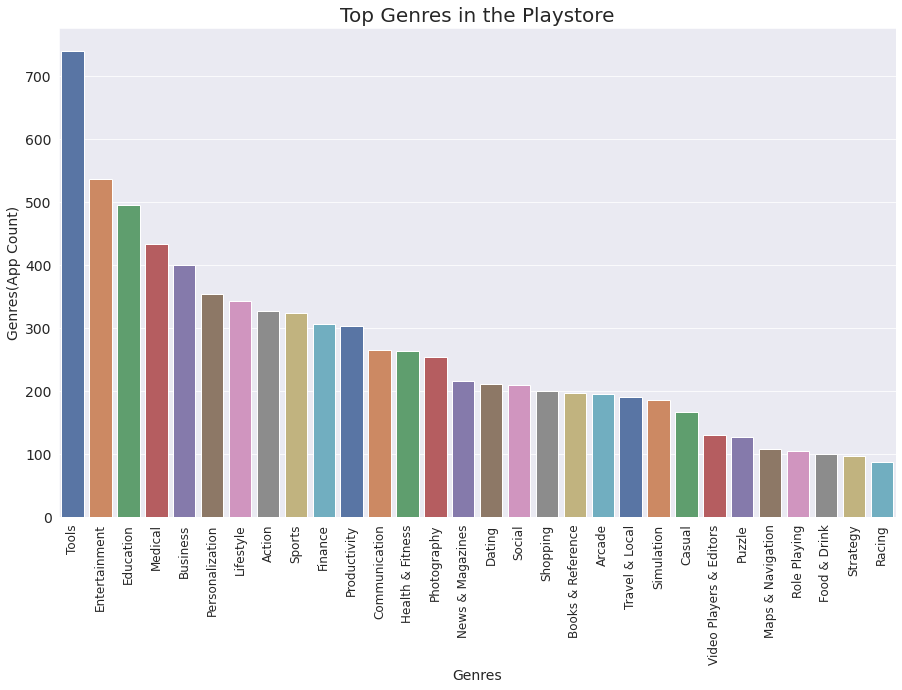

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

**Note:** From the above visualization we can see that the Highest Number of Apps found in the `Tools` and `Entertainment` genres followed by `Education`, `Medical` and many more.

#Inferences and Conclusion

*After Analyzing the dataset I have got answers to some of the serious & interesting question which any of the android users would love to know.*

 ***Top categories on Google Playstore?***
 
 ***Which category of Content are found more?***

 ***Distribution of the ratings of the apps?***

 ***What percentage of apps are Free and Paid?***

 ***Which category of App's have most number of installs?***

 ***What are the Top 10 installed apps in different category?***

 ***Which are the top expensive Apps?***

 ***Which are the Apps with highest number of reviews?***

 ***Count of Apps found in different genres?***

 ***Which are the apps that have made the highest earning?***

After the completion of my project and the course I have learned and got exposure to different tools and techniques in data analysis. I was able to complete the project successfully with the help of tools like Python, Pandas, Matplotlib, Numpy, Seaborn, and Jovian. Also I learned different techniques like Data Cleaning, Data Preparation, Data Exploration and visualization, and Data Interpretation.